# Re-creating the optimal exit triggers figure (pg. 279)

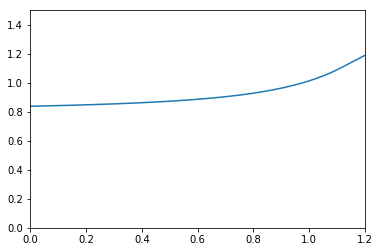

In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy import optimize

theta = 0.0
sigma = 0.5
c = 0.01
k = 0.5
rho = 0.01
integral_upper_lim = 10**3

def F_plus(eps):
    c1 = rho / k - 1.0
    c2 = np.sqrt(2 * k / sigma**2) * (theta - eps)
    integrand = lambda u: np.power(u, c1) * np.exp(-c2 * u - u**2 / 2)
    return integrate.quad(integrand, 0, integral_upper_lim)[0]

def F_plus_prime(eps):
    c1 = rho / k
    c2 = np.sqrt(2 * k / sigma**2) * (theta - eps)
    integrand = lambda u: np.power(u, c1) * np.sqrt(2 * k / sigma**2) * np.exp(-c2 * u - u**2 / 2)
    return integrate.quad(integrand, 0, integral_upper_lim)[0]

eps_star = optimize.root_scalar(lambda eps: (eps - c) * F_plus_prime(eps) - F_plus(eps),
                                method='brentq',
                                x0=0.5,
                                bracket=[0,2]).root

def H_plus(eps):
    A = (eps_star - c) / F_plus(eps_star)
    
    if eps < eps_star:
        return A * F_plus(eps)
    else:
        return eps - c
    
eps_max = 1.2 #chosen to match the scale of the book's figure

all_eps = np.linspace(0, eps_max, 101)
all_H_plus = np.array([H_plus(eps) for eps in all_eps])
plt.plot(all_eps, all_H_plus)

#try to match the scale of the book's figures
plt.ylim([0, 1.5])
plt.xlim([0, eps_max])

plt.show()